# Распределение степеней узлов

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html
    * https://numpy.org/doc/2.2/reference/random/generated/numpy.random.zipf.html
* Дополнительные источники:
    * https://www.scaler.com/topics/matplotlib/logarithmic-scale-matplotlib/
    * https://ucilnica.fri.uni-lj.si/pluginfile.php/1147/course/section/1508/book_chapter_4.pdf
* Датасеты с сетями:
    * http://networkrepository.com

## Вопросы для совместного обсуждения

1\. Обсудите различные подходы к вычислению степеней узлов графа.

2\. Обсудите использование различных шкал (линейной, логарифмической) для визуализациии графиков.

## Задачи для самостоятельного решения

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import zipf
from scipy.special import zeta


<p class="task" id="1"></p>

1\. Создайте неориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Добавьте узлам атрибут `name`, который содержит имя человека. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте степень каждого узла на основе этой матрицы. Выведите имя человека, чей узел имеет максимальную степень, и само значение степени.

- [x] Проверено на семинаре

In [4]:
G = nx.read_edgelist('data/fb-pages-food/fb-pages-food.edges', delimiter=',', nodetype=int)
G.is_directed()

False

In [5]:
nodes = pd.read_csv('data/fb-pages-food/fb-pages-food.nodes')
names_mapping = {node['new_id']: node['name'] for node in nodes[['name','new_id']].iloc }
nx.set_node_attributes(G, names_mapping, 'name')

In [6]:
loops = list(nx.selfloop_edges(G))
G.remove_edges_from(loops)
print(f"Удалено петель: {len(loops)}")

Удалено петель: 11


In [7]:
nodes_order = sorted(list(G.nodes()))
adj_matrix = nx.to_numpy_array(G, nodelist=nodes_order)
adj_matrix.shape

(620, 620)

In [8]:
degrees_from_matrix = np.sum(adj_matrix, axis=1)
max_degree_index = np.argmax(degrees_from_matrix)
max_degree_value = degrees_from_matrix[max_degree_index]
target_node_id = nodes_order[max_degree_index]
target_person_name = G.nodes[target_node_id]['name']

print(f"node: {target_node_id}")
print(f"name: {target_person_name}")
print(f"deg: {max_degree_value}")

node: 265
name: Logan Junior Chef
deg: 132.0


<p class="task" id="2"></p>

2\. Используя граф из предыдущего задания, посчитайте степени каждого узла, используя возможности графа `nx.Graph`. Посчитайте и выведите на экран среднюю степень узлов графа, округленную до ближайшего целого.

- [x] Проверено на семинаре

In [9]:
print(G.degree)
print(f'Средняя степень узлов = {np.array(G.degree)[:,1].mean():.0f}')

[(0, 6), (276, 9), (58, 15), (132, 2), (603, 27), (398, 9), (555, 17), (1, 2), (265, 132), (611, 47), (2, 3), (182, 31), (345, 11), (3, 10), (608, 7), (377, 10), (40, 7), (352, 19), (450, 7), (484, 3), (299, 11), (65, 8), (185, 9), (228, 2), (557, 5), (227, 15), (90, 51), (151, 21), (394, 1), (4, 4), (287, 2), (254, 17), (336, 2), (5, 1), (503, 2), (6, 5), (429, 7), (163, 6), (486, 3), (478, 10), (518, 59), (7, 7), (293, 4), (305, 4), (339, 4), (35, 22), (444, 3), (583, 4), (8, 5), (278, 2), (434, 22), (73, 2), (98, 7), (369, 4), (9, 28), (317, 32), (288, 37), (206, 3), (289, 26), (249, 5), (593, 14), (550, 21), (131, 26), (446, 20), (89, 43), (15, 10), (340, 55), (248, 25), (229, 31), (56, 47), (570, 14), (189, 5), (107, 12), (23, 14), (465, 16), (67, 56), (351, 11), (498, 33), (10, 2), (393, 4), (258, 7), (11, 6), (212, 6), (485, 10), (264, 12), (380, 6), (174, 7), (259, 5), (12, 3), (548, 5), (618, 6), (310, 1), (13, 1), (14, 2), (326, 1), (70, 47), (454, 4), (505, 35), (43, 12), (4

<p class="task" id="3"></p>

3\. Создайте ориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте входящую и исходящую степень каждого узла на основе этой матрицы. Найдите и выведите на экран максимальное значение исходящих степеней и среднее значение входящих степеней.

- [x] Проверено на семинаре

In [10]:
G = nx.read_edgelist('data/fb-pages-food/fb-pages-food.edges',create_using=nx.DiGraph, delimiter=',', nodetype=int)
G.is_directed()

True

In [11]:
loops = list(nx.selfloop_edges(G))
G.remove_edges_from(loops)
print(f"Удалено петель: {len(loops)}")

Удалено петель: 11


In [12]:
nodes_order = sorted(list(G.nodes()))
adj_matrix = nx.to_numpy_array(G, nodelist=nodes_order)

out_degrees = np.sum(adj_matrix, axis=1)
in_degrees = np.sum(adj_matrix, axis=0)

max_out_degree = np.max(out_degrees)
mean_in_degree = np.mean(in_degrees)

print(f"Максимальная исходящая степень = {int(max_out_degree)}")
print(f"Средняя входящая степень = {mean_in_degree}")

Максимальная исходящая степень = 67
Средняя входящая степень = 3.3725806451612903


<p class="task" id="4"></p>

4\. Постройте графики выборочной функции распределения входящих и исходящих степеней узлов для загруженного ориентированного графа. Для нахождения степеней узлов воспользуйтесь возможностями графа `nx.DiGraph`. Добавьте графикам названия, а осям - подписи. Расположите графики рядом по горизонтали.

- [ ] Проверено на семинаре

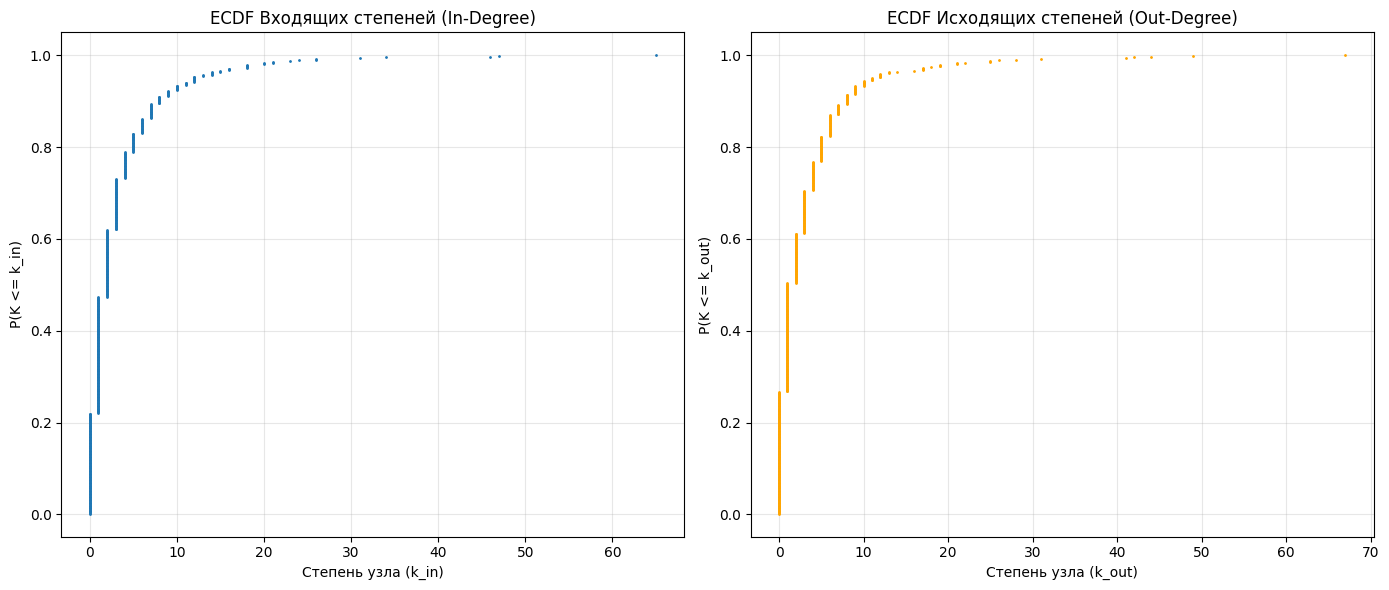

In [21]:
def get_ecdf_coords(data):
    x = np.sort(data)
    n = len(x)
    y = np.arange(1, n + 1) / n
    return x, y

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

x_in, y_in = get_ecdf_coords(in_degrees)
ax1.plot(x_in, y_in, marker='.', linestyle='none', markersize=2)
ax1.set_title("ECDF Входящих степеней (In-Degree)")
ax1.set_xlabel("Степень узла (k_in)")
ax1.set_ylabel("P(K <= k_in)")
ax1.grid(True, alpha=0.3)

x_out, y_out = get_ecdf_coords(out_degrees)
ax2.plot(x_out, y_out, marker='.', linestyle='none', color='orange', markersize=2)
ax2.set_title("ECDF Исходящих степеней (Out-Degree)")
ax2.set_xlabel("Степень узла (k_out)")
ax2.set_ylabel("P(K <= k_out)")
ax2.grid(True, alpha=0.3)

plt.tight_layout() 
plt.show()

<p class="task" id="5"></p>

5\. Визуализируйте закон распределения степеней узлов для неориентированного варианта графа в обычной и логарифимических (по 1й и по 2м осям) системах координат для неориентированного графа. Расположите графики в виде сетки 2х2. Добавьте графикам названия, а осям - подписи. Использование готовых функций для создания и визуализации гистограмм не допускается.

- [ ] Проверено на семинаре

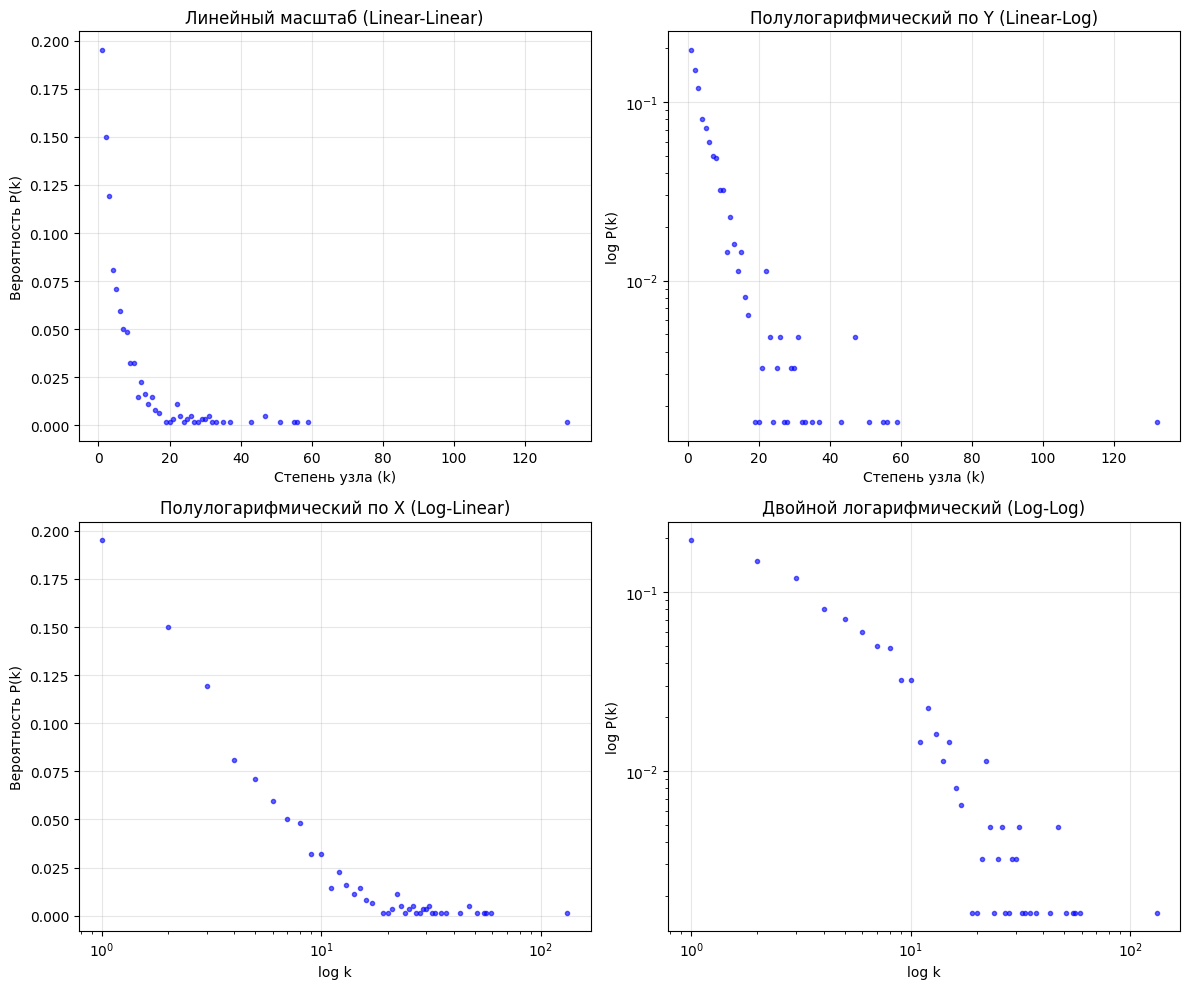

In [23]:
G = G.to_undirected()

all_degrees = [d for n, d in G.degree()]
total_nodes = len(G)

degree_counts = Counter(all_degrees)

x_values = sorted(degree_counts.keys())
y_values = [degree_counts[k] / total_nodes for k in x_values]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
marker_style = dict(color='blue', marker='o', linestyle='None', markersize=3, alpha=0.6)

ax1 = axes[0, 0]
ax1.plot(x_values, y_values, **marker_style)
ax1.set_title('Линейный масштаб (Linear-Linear)')
ax1.set_xlabel('Степень узла (k)')
ax1.set_ylabel('Вероятность P(k)')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
ax2.plot(x_values, y_values, **marker_style)
ax2.set_yscale('log') # Логарифм по Y
ax2.set_title('Полулогарифмический по Y (Linear-Log)')
ax2.set_xlabel('Степень узла (k)')
ax2.set_ylabel('log P(k)')
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
ax3.plot(x_values, y_values, **marker_style)
ax3.set_xscale('log')
ax3.set_title('Полулогарифмический по X (Log-Linear)')
ax3.set_xlabel('log k')
ax3.set_ylabel('Вероятность P(k)')
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.plot(x_values, y_values, **marker_style)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_title('Двойной логарифмический (Log-Log)')
ax4.set_xlabel('log k')
ax4.set_ylabel('log P(k)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<p class="task" id="6"></p>

6\. Сгенерируйте выборку из Дзета-распределения (распределение Ципфа) с числом наблюдений 10 тыс. и параметром распределения $\alpha=2$. Визуализируйте эмпирический закон распределения с использованием линейного и логарифмического биннинга. Визуализируйте оба варианта в линейных и логарифмических (log-log) координатах (должно получиться 4 изображения).


- [ ] Проверено на семинаре

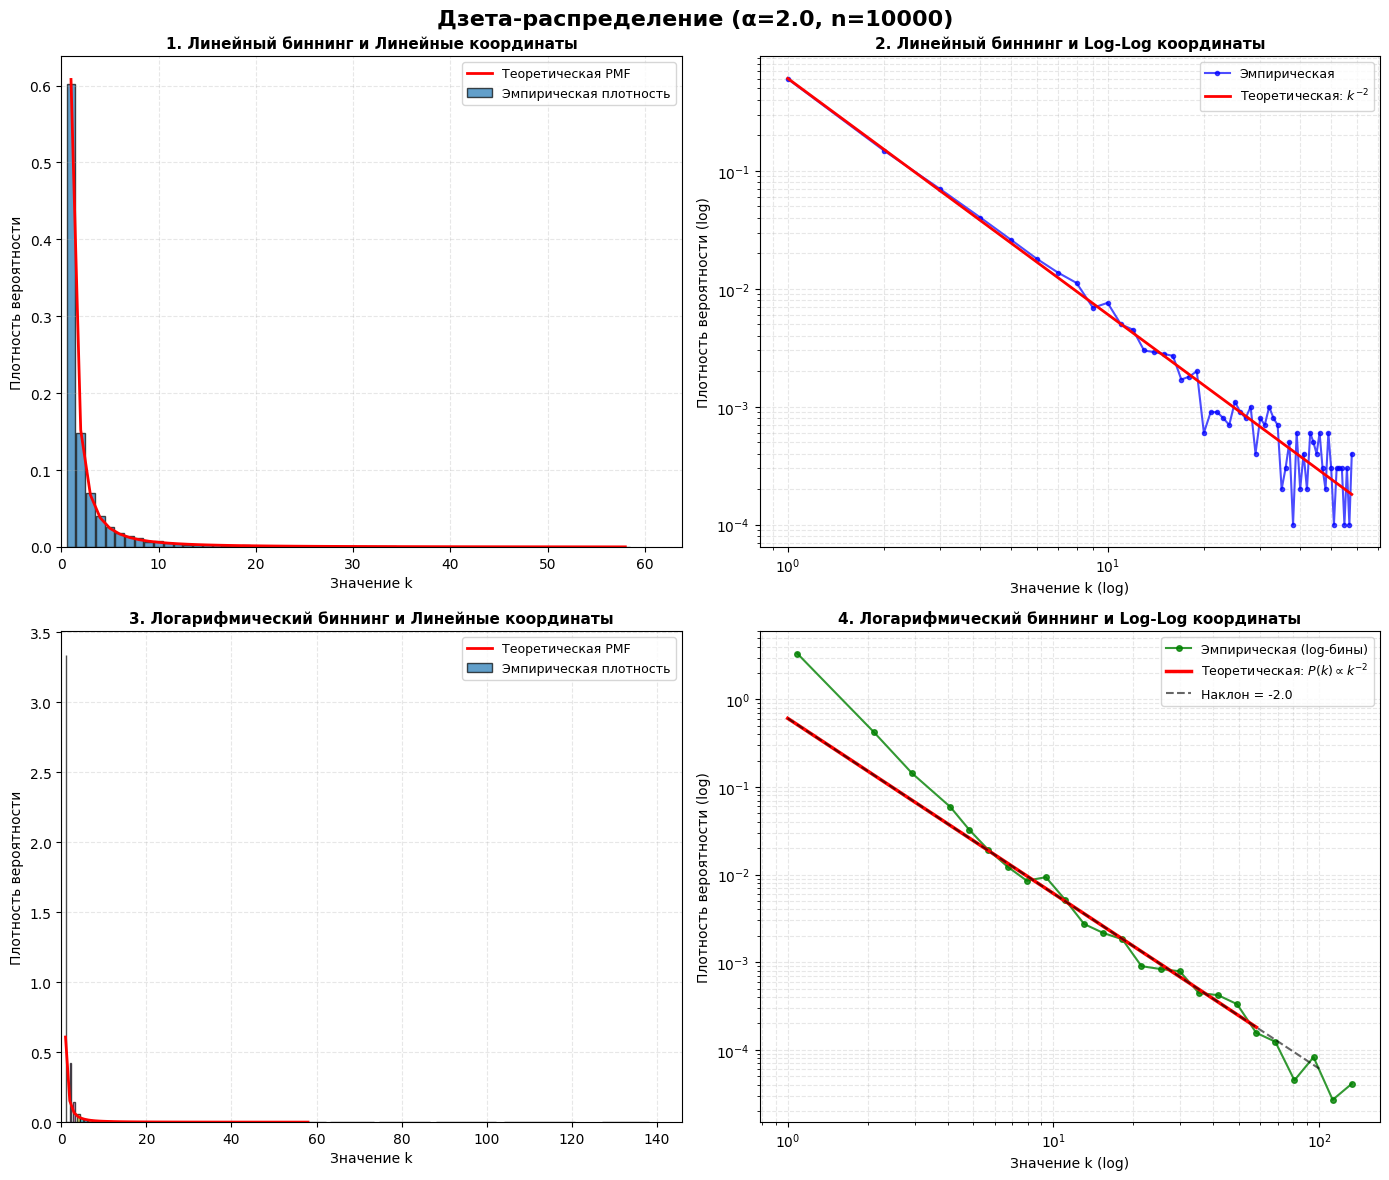

In [8]:

# np.random.seed(42)
alpha = 2.0
n_samples = 10000


sample = zipf.rvs(alpha, size=n_samples)



def linear_binning(data, max_val=None):
    if max_val is None:
        max_val = int(np.percentile(data, 99))
    bins = np.arange(1, max_val + 2) - 0.5
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    bin_width = bin_edges[1] - bin_edges[0]
    density = counts / (len(data) * bin_width)
    return bin_centers, density, counts

def log_binning(data, n_bins=30):
    data_pos = data[data > 0]
    min_val = data_pos.min()
    max_val = np.percentile(data_pos, 99.5)
    
    log_min, log_max = np.log10(min_val), np.log10(max_val)
    bin_edges = 10 ** np.linspace(log_min, log_max, n_bins + 1)
    
    counts, _ = np.histogram(data_pos, bins=bin_edges, density=False)
    bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])
    
    bin_widths = np.diff(bin_edges)
    density = counts / (len(data) * bin_widths)
    
    return bin_centers, density, counts, bin_edges[:-1]

lin_centers, lin_density, lin_counts = linear_binning(sample)
log_centers, log_density, log_counts, log_bin_edges = log_binning(sample)



x_theory = np.arange(1, int(np.percentile(sample, 99)) + 1)
pmf_theory = zipf.pmf(x_theory, alpha)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle(f'Дзета-распределение (α={alpha}, n={n_samples})', fontsize=16, fontweight='bold')

ax = axes[0, 0]
ax.bar(lin_centers, lin_density, width=0.9, alpha=0.7, label='Эмпирическая плотность', edgecolor='black')
ax.plot(x_theory, pmf_theory, 'r-', linewidth=2, label='Теоретическая PMF')
ax.set_xlabel('Значение k', fontsize=10)
ax.set_ylabel('Плотность вероятности', fontsize=10)
ax.set_title('1. Линейный биннинг и Линейные координаты', fontsize=11, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(0, lin_centers.max() * 1.1)




ax = axes[0, 1]
mask = (lin_density > 0) & (lin_centers > 0)
ax.loglog(lin_centers[mask], lin_density[mask], 'bo-', markersize=3, label='Эмпирическая', alpha=0.7)
ax.loglog(x_theory, pmf_theory, 'r-', linewidth=2, label='Теоретическая: $k^{-2}$')
ax.set_xlabel('Значение k (log)', fontsize=10)
ax.set_ylabel('Плотность вероятности (log)', fontsize=10)
ax.set_title('2. Линейный биннинг и Log-Log координаты', fontsize=11, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3, linestyle='--', which='both')




ax = axes[1, 0]
for i in range(len(log_centers)):
    width = log_bin_edges[i+1] - log_bin_edges[i] if i < len(log_bin_edges)-1 else log_bin_edges[i] * 0.1
    ax.bar(log_centers[i], log_density[i], width=width*0.9, 
           alpha=0.7, edgecolor='black', label='Эмпирическая плотность' if i==0 else '')

ax.plot(x_theory, pmf_theory, 'r-', linewidth=2, label='Теоретическая PMF')
ax.set_xlabel('Значение k', fontsize=10)
ax.set_ylabel('Плотность вероятности', fontsize=10)
ax.set_title('3. Логарифмический биннинг и Линейные координаты', fontsize=11, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(0, log_centers.max() * 1.1)




ax = axes[1, 1]
mask = (log_density > 0) & (log_centers > 0)
ax.loglog(log_centers[mask], log_density[mask], 'go-', markersize=4, 
          label='Эмпирическая (log-бины)', alpha=0.8)
ax.loglog(x_theory, pmf_theory, 'r-', linewidth=2.5, label='Теоретическая: $P(k) \\propto k^{-2}$')

x_ref = np.array([1, 100])
y_ref = pmf_theory[0] * (x_ref / 1) ** (-alpha)
ax.loglog(x_ref, y_ref, 'k--', linewidth=1.5, alpha=0.6, label=f'Наклон = -{alpha}')

ax.set_xlabel('Значение k (log)', fontsize=10)
ax.set_ylabel('Плотность вероятности (log)', fontsize=10)
ax.set_title('4. Логарифмический биннинг и Log-Log координаты', fontsize=11, fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3, linestyle='--', which='both')

plt.tight_layout()
plt.savefig('zeta_distribution_visualization.png', dpi=300, bbox_inches='tight')
plt.show()